In [14]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [15]:
data=pd.read_csv('global_heat_index.csv')
data.head(5)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [17]:
clean1=data[data['Hour']<6]
clean2=data[data['Hour']>18]

## Cleaning dataset

In [18]:
data.drop(clean1.index,axis=0,inplace=True)
data.drop(clean2.index,axis=0,inplace=True)
data

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
...,...,...,...,...,...,...,...,...,...,...,...
17510,2012,12,31,14,-8,24.219059,983.661621,10.363324,5.771851,1.837763,553
17511,2012,12,31,15,-9,22.715263,983.482239,11.240004,8.507614,1.937734,408
17512,2012,12,31,16,-7,19.968041,983.660339,14.983540,17.507896,2.191131,221
17513,2012,12,31,17,-5,16.706517,983.768677,21.564891,29.407814,2.675606,16


## Splitting data : Input and Output

In [19]:
x=data.iloc[:,:10]
y=data.iloc[:,-1]

## Scalling dataset

In [25]:
from sklearn.preprocessing import MinMaxScaler
x=pd.DataFrame(MinMaxScaler().fit_transform(x))

## Correllation Matrix Using HeatMap

In [21]:
mat_cor=data.corr()

<Axes: >

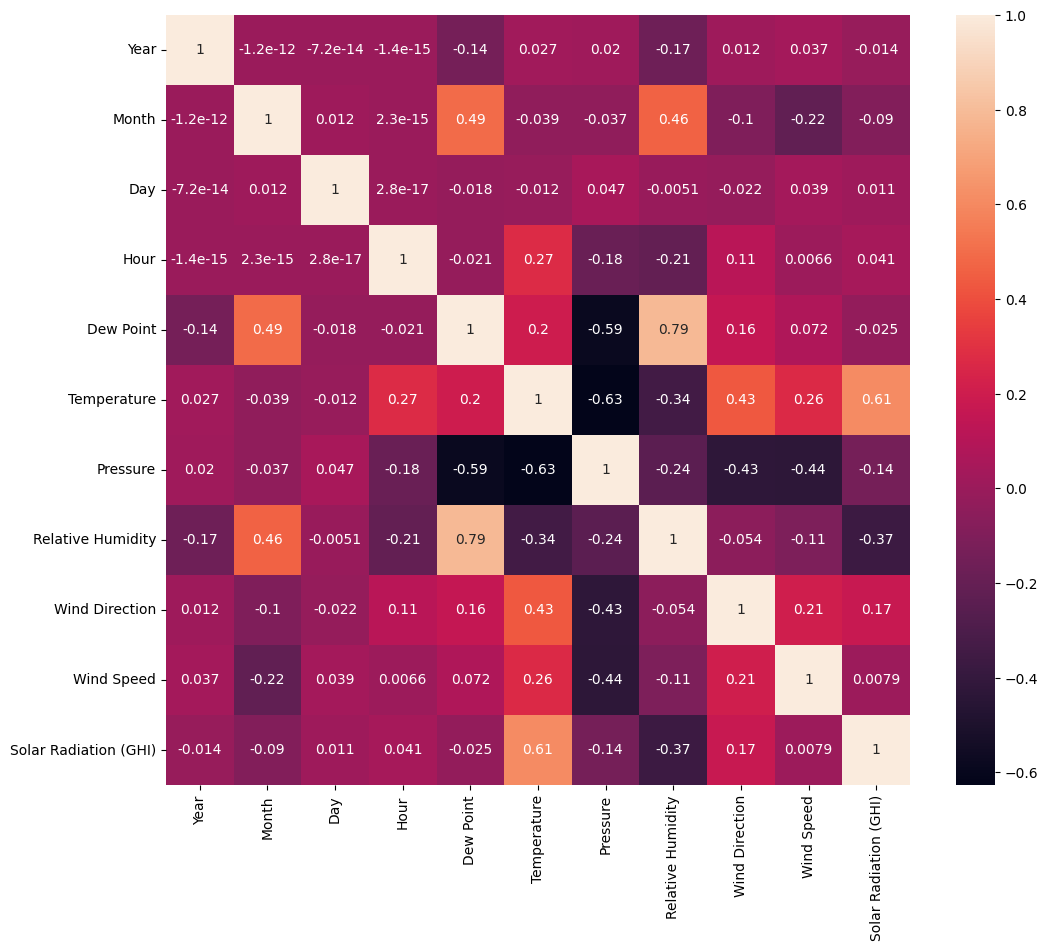

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(mat_cor,annot=True)